# EMDAT global disaster dataset 2020-2025

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [92]:
dataset_path = './datasets/emdat_global_disasters_2020_2025.csv'
df = pd.read_csv(dataset_path, sep=';', encoding='unicode_escape')

## Data preparation

In [93]:
# aggregate Start Year, Start Month, Start Day into a single date column, handling missing values
df['date'] = pd.to_datetime(dict(year=df['Start Year'], month=df['Start Month'].fillna(1), day=df['Start Day'].fillna(1)))
df['date'] = df['date'].dt.date  # keep only date part
df['date'] = pd.to_datetime(df['date'])  # convert back to datetime

In [95]:
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,date
0,2000-0028-ROU,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,ROU,...,NaN,NaN,NaN,NaN,NaN,"54,89515197","[{""adm1_code"":2450,""adm1_name"":""Bihor""},{""adm1...",2003-07-01,2023-09-25,2000-01-01
1,2000-0029-BGR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGR,...,NaN,NaN,NaN,NaN,NaN,"54,89515197","[{""adm1_code"":722,""adm1_name"":""Sofia""},{""adm1_...",2003-07-01,2023-09-25,2000-01-01
2,2000-0072-BIH,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,BIH,...,NaN,NaN,NaN,NaN,NaN,"54,89515197","[{""adm2_code"":6250,""adm2_name"":""Zenicko-dobojs...",2003-07-01,2023-09-25,2000-02-10
3,2000-0155-AUT,No,nat-hyd-mmw-ava,Natural,Hydrological,Mass movement (wet),Avalanche (wet),NaN,NaN,AUT,...,NaN,NaN,NaN,NaN,NaN,"54,89515197","[{""adm2_code"":5641,""adm2_name"":""Zell am See""}]",2003-07-01,2023-09-25,2000-03-28
4,2000-0164-RUS,No,nat-hyd-mmw-ava,Natural,Hydrological,Mass movement (wet),Avalanche (wet),NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,NaN,"54,89515197","[{""adm1_code"":2556,""adm1_name"":""Severnaya Oset...",2003-07-01,2023-09-25,2000-01-19


## Data inspection

In [40]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update', 'date'],
      dtype='object')

In [13]:
df['Disaster Type'].value_counts()

Disaster Type
Flood                          490
Storm                          373
Extreme temperature            322
Wildfire                        83
Drought                         26
Mass movement (wet)             18
Glacial lake outburst flood      2
Name: count, dtype: int64

In [15]:
df['ISO'].value_counts()[:10]

ISO
FRA    120
RUS    112
ITA     86
ROU     73
GBR     69
ESP     65
DEU     61
POL     52
GRC     48
BGR     45
Name: count, dtype: int64

## Data visualization

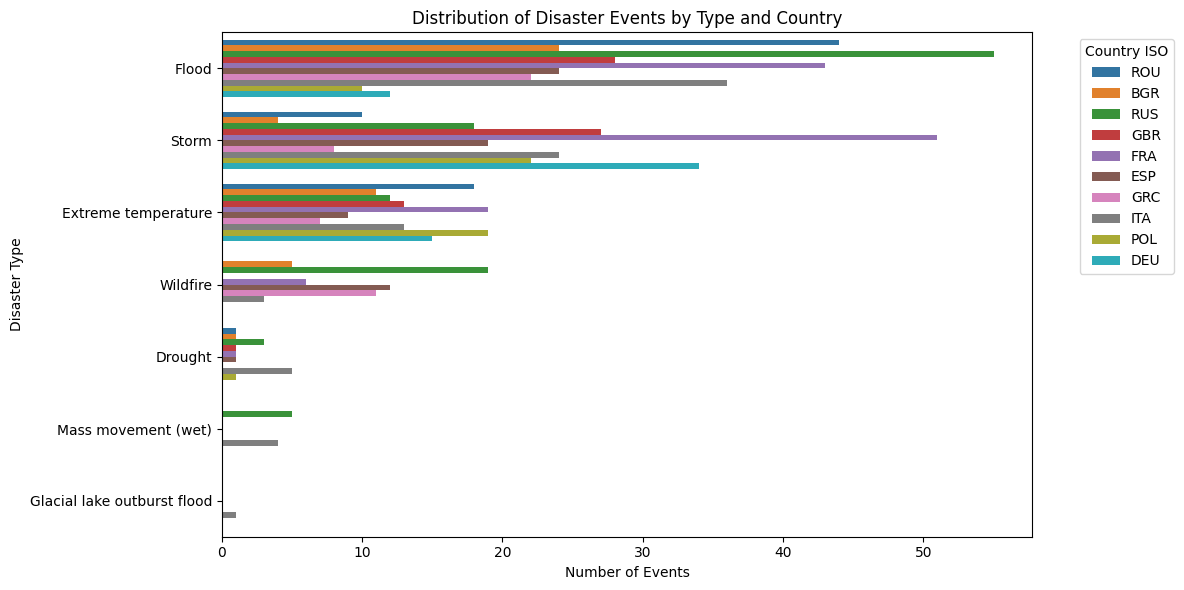

In [19]:
# plot distribution of events by disaster type and country (only top 10 countries)
plt.figure(figsize=(12,6))
top_10_countries = df['ISO'].value_counts().index[:10]
sns.countplot(data=df[df['ISO'].isin(top_10_countries)], y='Disaster Type', hue='ISO', order=df['Disaster Type'].value_counts().index)
plt.title('Distribution of Disaster Events by Type and Country')    
plt.xlabel('Number of Events')
plt.ylabel('Disaster Type')
plt.legend(title='Country ISO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\matti\AppData\Local\Temp\ipykernel_3016\2301322875.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="Total Damage ('000 US$)", hue='Disaster Type', log_scale=True)


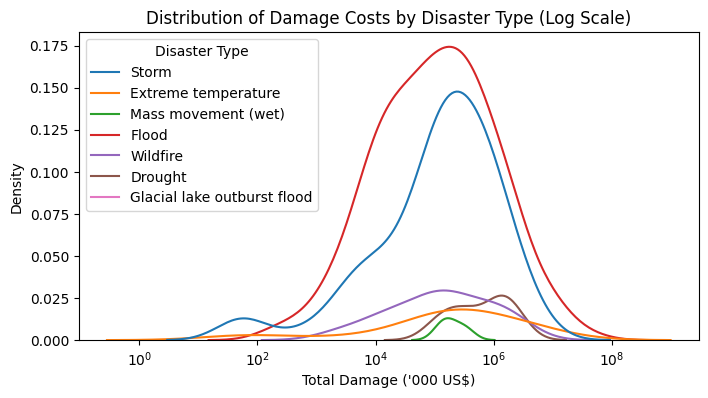

In [33]:
# plot distribution of Total Damage, as curves
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x="Total Damage ('000 US$)", hue='Disaster Type', log_scale=True)
plt.title('Distribution of Damage Costs by Disaster Type (Log Scale)')
plt.xlabel("Total Damage ('000 US$)")
plt.ylabel('Density')
plt.show()

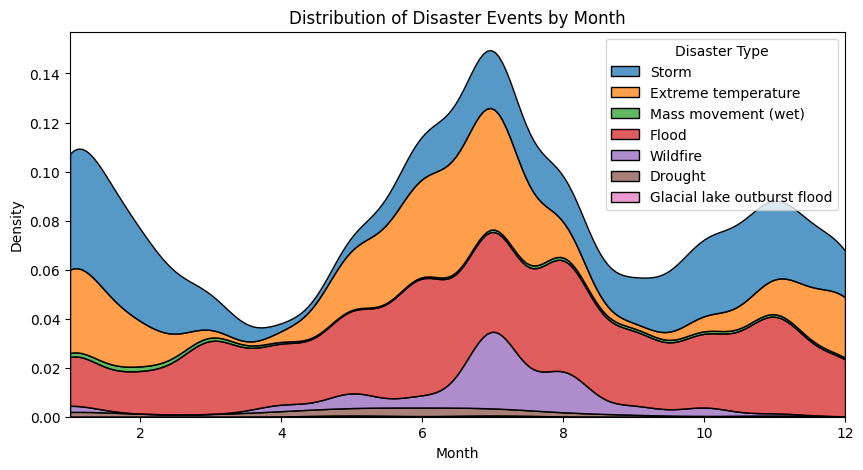

In [ ]:
# plot distribution of disasters during the year as curves,  by disaster type
# make sure the plot vurve is circular (i.e. last montsh connects to first month)
plt.figure(figsize=(10,5))
df['Month'] = df['date'].dt.month
sns.kdeplot(data=df, x='Month', hue='Disaster Type', multiple='stack', bw_adjust=0.5, cut=0)
plt.title('Distribution of Disaster Events by Month')
plt.xlabel('Month')
plt.ylabel('Density')
plt.xlim(1,12)
plt.show()